### Pytorch Computer Vision

In [59]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu118
0.18.0+cu118


In [60]:
# Setting device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## 1. Getting dataset

In [61]:
# Load data (FashionMNIST)
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [62]:
# Size of our datasets
len(train_data), len(test_data)

(60000, 10000)

In [63]:
# Image and label sample
image, label = train_data[0]
print(image, label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [64]:
# All dataset labels 
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [65]:
# Each value corresponds to a class label
class_to_idx = train_data.class_to_idx
class_to_idx   

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [66]:
# List of class labels
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [67]:
# Printing the image and label shape (image: color channel, height, width)
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing data

(-0.5, 27.5, 27.5, -0.5)

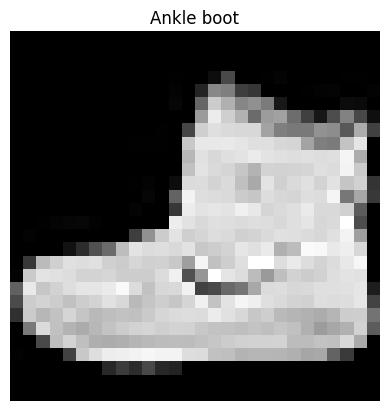

In [68]:
# Visualizing the image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

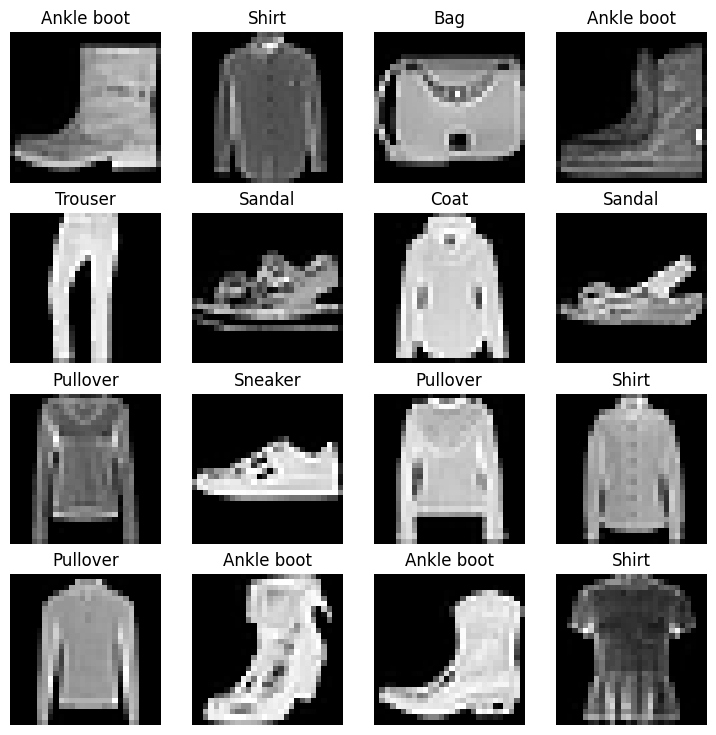

In [69]:
# Plotting multiple images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    sample_idx = torch.randint(len(train_data), size=[1]).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare Dataloader
Breaking data into batches.


The computer cannot "look" to, for example, 6000 thousands images at a time. So we split the data into smaller groups called batches.


Normally we use 32 batch size, or, 32 images at a time.

Also, it gives our neural network more chances to improve itself by epoch.

In [70]:
# Setup batch size hyperparameter
BATCH_SIZE = 32 # 64, 128, 256, 512, 1024

# Creating dataloaders
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7fe61e0e02c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe61af135f0>)

In [71]:
# Checking how many batches we have
print(f"Number of training batches: {len(train_dataloader)} of size {train_dataloader.batch_size}")
print(f"Number of testing batches: {len(test_dataloader)} of size {test_dataloader.batch_size}")

Number of training batches: 1875 of size 32
Number of testing batches: 313 of size 32


In [72]:
# Getting a batch sample from the dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
Shirt


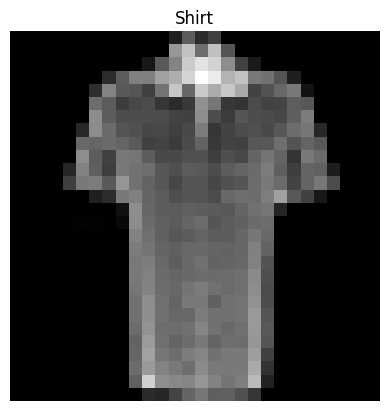

In [73]:
# Getting image and label from the batch sample
torch.manual_seed(42)
random_idx = torch.randint(BATCH_SIZE, size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(img.shape)
print(class_names[label])


## 3. Model 0 : Baseline model

In [74]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the image
output = flatten_model(x)
print(f"Before flattening: {x.shape}")
print(f"After flattening: {output.shape}")

Before flattening: torch.Size([1, 28, 28])
After flattening: torch.Size([1, 784])


In [75]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)

        )

    def forward(self, x):
        logits = self.layer_stack(x)
        return logits
        

In [76]:
torch.manual_seed(42)

# Instantiate the model
model_0 = FashionMNISTModelV0(input_shape=28*28, 
                              hidden_units=128,
                                output_shape=len(class_names))
model_0.to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [77]:
dummy_x = torch.rand(1, 28, 28).to(device)
model_0(dummy_x)

tensor([[-0.2292, -0.3081, -0.4636,  0.0714, -0.2627, -0.0312,  0.0321, -0.1599,
          0.1276,  0.1425]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss function, optimizer and evaluation metrics

* Loss function - `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD() `(stochastic gradient descent)
* Evaluation metric - accuracy.

In [78]:
# Importing helper functions
import requests
from pathlib import Path

if Path("helper_functions.py").exists():
    print("Helper functions already exist! Skipping download.")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

Helper functions already exist! Skipping download.


In [79]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr= 0.1) # Tutorial selected optimizer as SGD

# optimizer = torch.optim.Adam(model_0.parameters(), lr=1e-3) # Adam: Copilot suggestion
# What is Adam?
# Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

### 3.2 Creating a function to time the experiment

Often you want to track to things:
1. Model's performance (accuracy, loss)
2. How fast it runs

In [80]:
from timeit import default_timer as timer
def print_train_time (start: float, end:float, device: torch.device = None):
    print(f"Training time: {end - start:.2f} seconds on device:{device}")
    return end - start

### 3.3 Creating a training loop to train the model using batches of data

1. Loop through the data
2. Loop through the batches, perform training steps, calculate loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate loss *per batch*.
4. Print it out.
5. Time it.

In [81]:
from tqdm.notebook import tqdm# tqdm is a library that allows you to display progress bars in Python

torch.manual_seed(42)
train_time_start = timer()

# Number of epochs
EPOCHS = 3

# Training loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = 0
    for idx, (features, labels) in enumerate(train_dataloader):
        model_0.train()
        # Getting the data to the device
        features = features.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_0(features)

        # Loss calculation
        loss = loss_fn(outputs, labels)
        train_loss += loss # accumulate loss for each batch

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if idx % 400 == 0:
            print(f"Batch {idx} loss: {loss.item()}")
train_loss /= len(train_dataloader)




# Testing the model
test_loss, test_accuracy = 0, 0
model_0.eval()
with torch.inference_mode():
    for features, labels in test_dataloader:
        # Getting the data to the device
        features = features.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_0(features)

        # Loss calculation
        test_loss += loss_fn(outputs, labels)

        # Accuracy calculation
        test_accuracy += accuracy_fn(y_true=labels, y_pred=outputs.argmax(dim=1))

    # Averaging the loss and accuracy
    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)  

    print(f"Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

train_time_end = timer()
total_train_time_model_0 = print_train_time(train_time_start, train_time_end, device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Batch 0 loss: 2.3405284881591797
Batch 400 loss: 0.6049758791923523
Batch 800 loss: 0.6499577760696411
Batch 1200 loss: 0.3559314012527466
Batch 1600 loss: 0.35203197598457336
Epoch 2
-------------------------------
Batch 0 loss: 0.25963032245635986
Batch 400 loss: 0.5991396903991699
Batch 800 loss: 0.399014949798584
Batch 1200 loss: 0.3362348675727844
Batch 1600 loss: 0.5327666401863098
Epoch 3
-------------------------------
Batch 0 loss: 0.5037592649459839
Batch 400 loss: 0.5679938197135925
Batch 800 loss: 0.3702755272388458
Batch 1200 loss: 0.2893134355545044
Batch 1600 loss: 0.422565758228302
Train loss: 0.4523, Test loss: 0.5095, Test accuracy: 82.2384
Training time: 19.93 seconds on device:cpu


## 4. Make predictions and get Model 0 results

In [188]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containign the results of the model prediction.
    """
    loss, accuracy = 0, 0

    model.eval()

    with torch.inference_mode():
        for features, labels in tqdm(data_loader):
            # Getting the data to the device
            features, labels = features.to(device), labels.to(device)

            # Forward pass
            outputs = model(features)

            # Accumulate loss and accuracy for each batch
            loss += loss_fn(outputs, labels)
            accuracy += accuracy_fn(y_true=labels, y_pred=outputs.argmax(dim=1))

        # Averaging the loss and accuracy
        loss /= len(data_loader)
        accuracy /= len(data_loader)

    return {"model_name": model.__class__.__name__, "loss": loss.item(), "accuracy": accuracy}

# Evaluating the model
model_0_results = eval_model(model_0, train_dataloader, loss_fn, accuracy_fn)
model_0_results


  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'loss': 0.46243253350257874,
 'accuracy': 83.94333333333333}

## 6. Model 1: Creating a better model with non-linear activations


In [83]:
# Model 1
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        logits = self.layer_stack(x)
        return logits

In [84]:
# Instacing the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28, hidden_units=128, output_shape=len(class_names))
model_1.to(device)

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

## 6.1 Setting up the loss function and evaluation metric

In [85]:
# Loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)
accuracy_fn = accuracy_fn


### 6.2 Functionizing training and testing loops

* Training loop - `train_step()`
* Testing loop - `test_step()`

In [86]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    """
    Performs a single training step.
    """
    train_loss, train_accuracy = 0, 0

    model.train()

    # Training loop
    for batch, (features, labels) in enumerate(dataloader):
        # Getting the data to the device
        features, labels = features.to(device), labels.to(device)

        # Forward pass (raw predictions)
        outputs = model(features)

        # Loss and accuracy calculation 
        loss = loss_fn(outputs, labels)
        train_loss += loss # accumulate loss for each batch

        train_accuracy += accuracy_fn(y_true=labels, y_pred=outputs.argmax(dim=1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Averaging the loss and accuracy
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)
    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_accuracy:.4f}")

In [87]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    """
    Perfoms a test loop for the model.
    """
    
    test_loss, test_accuracy = 0, 0

    model.eval()
    with torch.inference_mode():
        for features, labels in dataloader:
            # Getting the data to the device
            features, labels = features.to(device), labels.to(device)

            # Forward pass
            outputs = model(features)

            # Loss calculation
            test_loss += loss_fn(outputs, labels)

            # Accuracy calculation
            test_accuracy += accuracy_fn(y_true=labels, y_pred=outputs.argmax(dim=1))

        # Averaging the loss and accuracy
        test_loss /= len(dataloader)
        test_accuracy /= len(dataloader)

        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")  

In [88]:
torch.manual_seed(42)

# Start timer
model_1_train_time_start = timer()

# Number of epochs
EPOCHS = 3

# Training loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)

# Testing the model
test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)

# End timer
model_1_train_time_end = timer()
# Print training time
total_train_time_model_1 = print_train_time(model_1_train_time_start, model_1_train_time_end, device)

model_1_results = eval_model(model_1, train_dataloader, loss_fn, accuracy_fn)
model_1_results

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Train loss: 0.5632, Train accuracy: 79.7367
Epoch 2
-------------------------------
Train loss: 0.4080, Train accuracy: 85.0750
Epoch 3
-------------------------------
Train loss: 0.3678, Train accuracy: 86.5567
Test loss: 0.4091, Test accuracy: 85.3235
Training time: 19.28 seconds on device:cpu


  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'loss': 0.35547375679016113,
 'accuracy': 87.21666666666667}

In [89]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'loss': 0.46243253350257874,
 'accuracy': 83.94333333333333}

## Model 2: Building a Convolutional Neural Network (CNN)

CNNs are the most popular neural network architecture for image classification tasks.

CNN's are also know as ConvNets.

In [90]:
# Create a convolutional neural network model
#Copilot sugestion
# class FashionMNISTModelV2(nn.Module):
#     def __init__(self, in_channels: int, num_classes: int):
#         super().__init__()
#         self.layer_stack = nn.Sequential(
#             nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Flatten(),
#             nn.Linear(in_features=32*7*7, out_features=128),
#             nn.ReLU(),
#             nn.Linear(in_features=128, out_features=num_classes)
#         )

#     def forward(self, x: torch.Tensor):
#         logits = self.layer_stack(x)
#         return logits


#Tutorial model
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG architecture.
    """
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units*2, # copilot is suggesting "hidden_units*2", instead of "hidden_units"
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units*2,
                      out_channels=hidden_units*2,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= 7*7*hidden_units*2, # Copilot is suggesting 7*7*hidden_units*2 instead of 7*7*hidden_units (7*7 is the output shape of the last MaxPool2d layer)
                      out_features= hidden_units*4),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units*4,
                      out_features= output_shape)
        )
        
        # Copilot is suggesting two Linear layers instead of one and hidden_units*4 instead of hidden_units*2

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x
        

### 7.1 Stepping through the CNN `nn.Conv2d()`

Convolutional layers are the building blocks of CNNs. 

A convolution is a linear operation that involves the multiplication of a set of weights with the input, much like a fully connected layer. The difference is that the input is usually a 3D volume (width, height, depth) instead of a 1D vector.



In [91]:
torch.manual_seed(42)

# Creating batches of images
images = torch.rand(size=(32, 3, 64, 64)).to(device)
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")


Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.

In [92]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10, 
                       kernel_size=3, 
                       stride=1, padding=0)

# Pass the data through the conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[-0.4432, -0.4266, -0.7313,  ..., -0.3842, -0.4029, -0.2580],
          [-0.5172, -0.6280, -0.5067,  ..., -0.5455, -0.2697, -0.3392],
          [-0.6129, -0.4303, -0.3513,  ..., -0.2895, -0.3527, -0.5661],
          ...,
          [-0.4673, -0.3827, -0.3777,  ..., -0.5011, -0.5698, -0.2990],
          [-0.3849, -0.4654, -0.5875,  ..., -0.7656, -0.4689, -0.4657],
          [-0.5404, -0.1720, -0.1813,  ..., -0.7557, -0.5228, -0.5067]],

         [[-0.5316, -0.1805, -0.3830,  ..., -0.3040,  0.1747, -0.1271],
          [-0.0159, -0.2488, -0.2986,  ..., -0.0356, -0.2788, -0.3086],
          [-0.2891, -0.4163, -0.3072,  ..., -0.2823, -0.1784, -0.3035],
          ...,
          [-0.3779, -0.1186, -0.1976,  ..., -0.0708, -0.1470, -0.2759],
          [ 0.0127,  0.0269, -0.0898,  ..., -0.1350, -0.1111, -0.4801],
          [-0.3296,  0.0213,  0.0134,  ..., -0.3110, -0.2932, -0.3754]],

         [[ 0.4062,  0.3490,  0.5550,  ...,  0.5446,  0.4686,  0.3256],
          [ 0.5676,  0.5045,  

### 7.2 Stepping through the CNN `nn.MaxPool2d()`

Max pooling is a technique used to downsample the image. It takes the maximum value from a region of pixels.

In [93]:
# Printing the shapes
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqueezed shape: {test_image.unsqueeze(0).shape}")
torch.manual_seed(42)

# Create a random tensor
random_tensor = torch.rand(size=(1, 1, 2, 2)).to(device)

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

# Pass the data through the max pool layer
max_pool_output = max_pool_layer(conv_output)
print(f"Max pool output shape: {max_pool_output.shape}")

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Random tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
print(f"Max pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Max pool output shape: torch.Size([1, 10, 31, 31])
Random tensor: tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor: tensor([[[[0.9593]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [94]:
torch.manual_seed(42)
# Instantiate the model
model_2 = FashionMNISTModelV2(input_shape=1, 
                              hidden_units=32, # Copilot is suggesting hidden_units=32, instead of 10. Following copilot sugestion
                              output_shape=len(class_names)).to(device) 

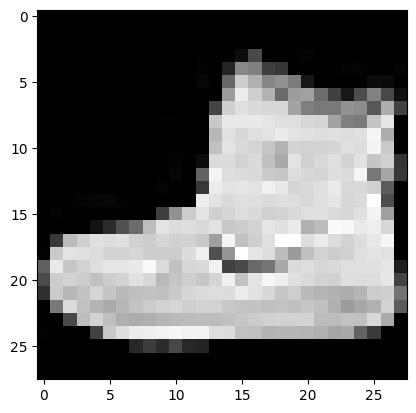

In [95]:
plt.imshow(image.squeeze(), cmap='gray')

In [96]:
# pass the image through the model
model_2_output = model_2(image.unsqueeze(0))
model_2_output

tensor([[ 0.0858,  0.0584, -0.0879,  0.0368,  0.0267, -0.0429,  0.0336, -0.0467,
          0.0538, -0.0192]], grad_fn=<AddmmBackward0>)

In [97]:
# Getting label from the model output
model_2_output.argmax(dim=1)

tensor([0])

### 7.3 Setup the loss function, optimizer and evaluation metric

In [98]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1) # Copilot is suggesting Adam instead of SGD
accuracy_fn = accuracy_fn

# What we want to optimize
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing the CNN

In [99]:
# Setting seeds
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

# Start timer
model_2_train_time_start = timer()

# Number of epochs
EPOCHS = 5

# Training loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn, device)

# Testing the model
test_step(model_2, test_dataloader, loss_fn, accuracy_fn, device)

# End timer
model_2_train_time_end = timer()
# Print training time
total_train_time_model_2 = print_train_time(model_2_train_time_start, model_2_train_time_end, device)



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Train loss: 0.5785, Train accuracy: 78.3433
Epoch 2
-------------------------------
Train loss: 0.3006, Train accuracy: 88.9567
Epoch 3
-------------------------------
Train loss: 0.2503, Train accuracy: 90.8367
Epoch 4
-------------------------------
Train loss: 0.2196, Train accuracy: 91.8383
Epoch 5
-------------------------------
Train loss: 0.1936, Train accuracy: 92.9433
Test loss: 0.2518, Test accuracy: 91.2440
Training time: 214.64 seconds on device:cpu


In [168]:
# Getting model results
torch.manual_seed(42)
model_2_results = eval_model(model_2, train_dataloader, loss_fn, accuracy_fn)
model_2_results

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'loss': 0.1784193515777588,
 'accuracy': 93.505}

## 8. Comparing results between models

In [169]:
import pandas as pd

results_Dataframe = pd.DataFrame([model_0_results, model_1_results, model_2_results])

results_Dataframe

,model_name,loss,accuracy
0,FashionMNISTModelV0,0.462433,83.943333
1,FashionMNISTModelV1,0.355474,87.216667
2,FashionMNISTModelV2,0.178419,93.505000


In [170]:
# Add training time to the dataframe
results_Dataframe["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
results_Dataframe

,model_name,loss,accuracy,training_time
0,FashionMNISTModelV0,0.462433,83.943333,19.925949
1,FashionMNISTModelV1,0.355474,87.216667,19.279703
2,FashionMNISTModelV2,0.178419,93.505000,214.640580


Text(0, 0.5, 'Model')

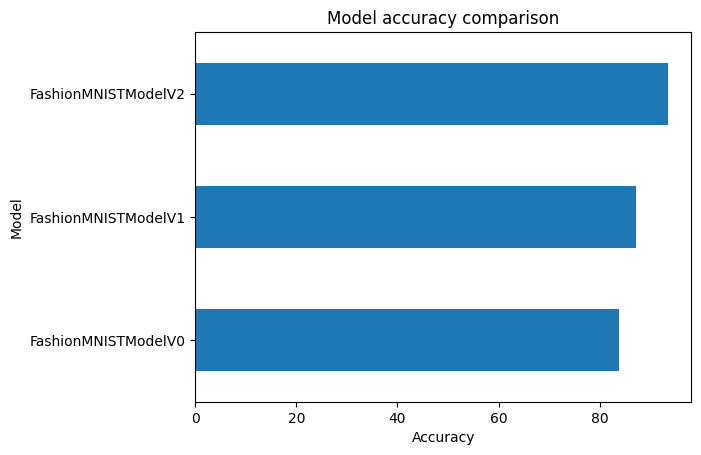

In [171]:
# Visualizing the results
import matplotlib.pyplot as plt

results_Dataframe.plot(kind="barh", x="model_name", y="accuracy", title="Model accuracy comparison", legend=False)
plt.xlabel("Accuracy")
plt.ylabel("Model")


## 9. Make and evaluate random predictions with best model

In [172]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device):
                    
    """
    Returns the model probabilites for a given dataset.
    """
    predictions_probabilities = []
    # Sending the model to device and setting to evaluation mode
    model.to(device)
    model.eval()


    with torch.inference_mode():
        for sample in data:
            # Getting the data to the device and adding a batch dimension
            sample = torch.unsqueeze(sample, 0).to(device)

            # Forward pass
            output = model(sample)

            # Getting the prediction probability and class
            prediction_probability = torch.softmax(output.squeeze(), dim=0)

            # Appending the prediction probability to the list
            predictions_probabilities.append(prediction_probability.cpu())

    return torch.stack(predictions_probabilities)

            

In [173]:
import random
# random.seed(42)
test_sample, test_labels = [], []

for sample, label in random.sample(list(test_data), k= 9):
    test_sample.append(sample)
    test_labels.append(label)

test_sample[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

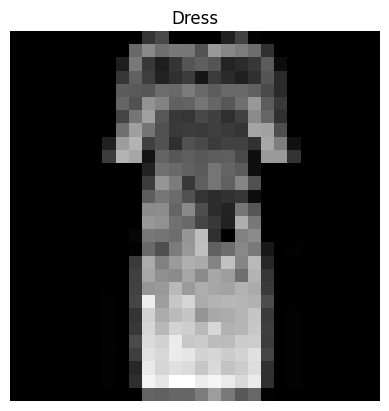

In [174]:
plt.imshow(test_sample[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [175]:
# Make predictions for the test samples
pred_probs = make_predictions(model_2, test_sample, device)

# Get the predicted classes
pred_classes = pred_probs.argmax(dim=1)

# Get the predicted class names
pred_class_names = [class_names[label] for label in pred_classes]
pred_class_names


['Dress',
 'Coat',
 'Sneaker',
 'T-shirt/top',
 'Ankle boot',
 'Shirt',
 'Coat',
 'Sneaker',
 'Pullover']

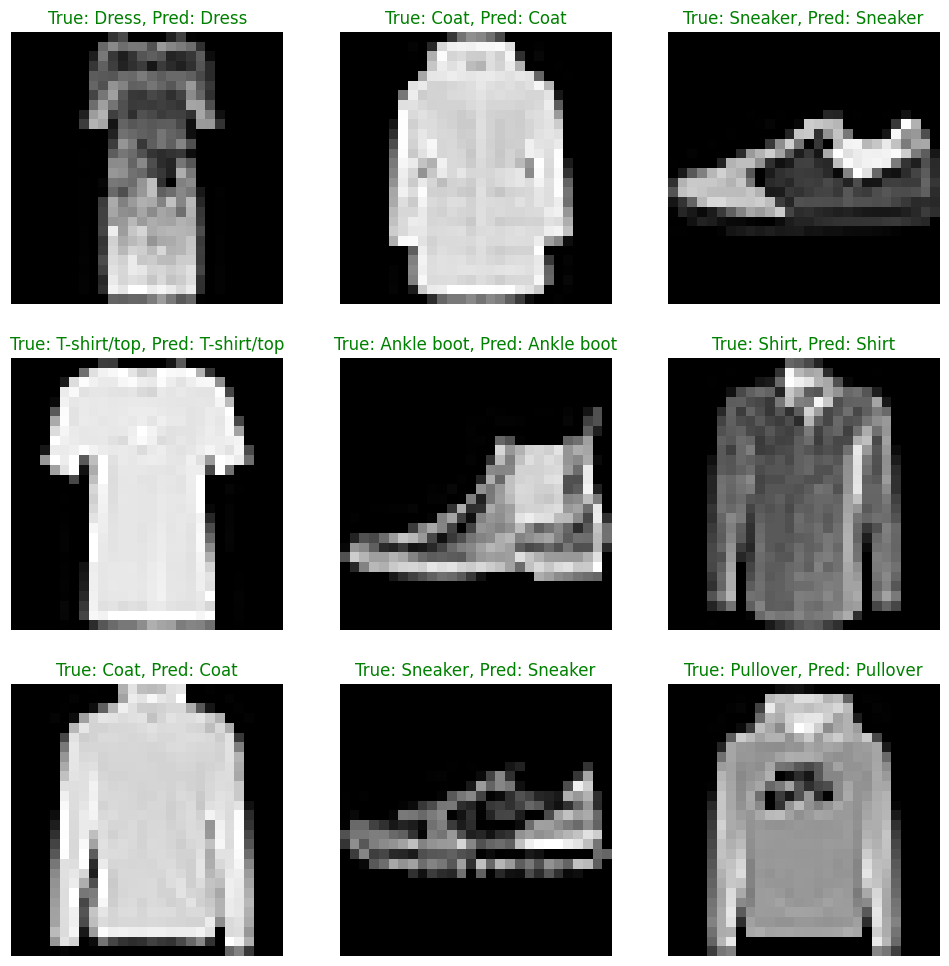

In [176]:
# Ploting images and model predictions
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_sample[i].squeeze(), cmap='gray')
    ax.set_title(f"True: {class_names[test_labels[i]]}, Pred: {pred_class_names[i]}", color="green" if test_labels[i] == pred_classes[i] else "red")
    ax.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions using our best model
2. Create confusion matrix using `torchmetrics.ConfusionMatrix()`
3. Plot confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [177]:
from tqdm.notebook import tqdm

# 1. Make predictions for the test data
y_preds = []
model_2.to(device)
model_2.eval()
with torch.inference_mode():
    for features, labels in tqdm(test_dataloader, desc= "Making predictions..."):
        # Sending data to device
        features, labels = features.to(device), labels.to(device)

        # Forward pass
        outputs = model_2(features)

        # Prediction logits -> probabilities
        prediction = torch.softmax(outputs.squeeze(), dim=0).argmax(dim=1).cpu()
        y_preds.append(prediction)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

In [178]:
import torchmetrics, mlxtend
print(mlxtend.__version__)
print(torchmetrics.__version__)

0.23.1
1.3.2


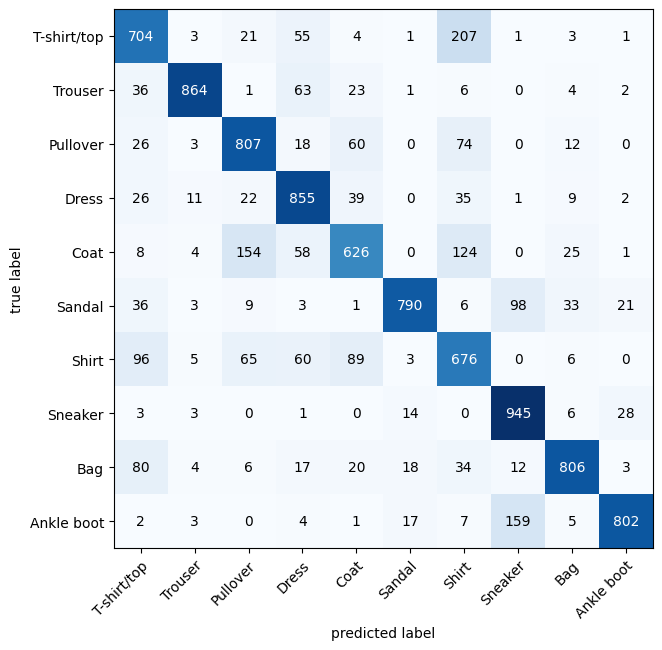

In [179]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets

# Create a confusion matrix
cm = ConfusionMatrix(task= "multiclass",num_classes=len(class_names))
cm_tensor = cm(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_tensor.numpy(),
                                class_names=class_names, 
                                figsize=(10, 7))
plt.show()


## 11. Saving and exporting the best performing model

In [180]:
from pathlib import Path

# Create a directory to save the model
MODEL_DIR = Path("models")
MODEL_DIR.mkdir(parents= True,
                exist_ok=True)

MODEL_NAME = "FashionMNIST_computer_vision_model.pth"
MODEL_SAVE_PATH = MODEL_DIR / MODEL_NAME

# Save the model
torch.save(model_2.state_dict(), MODEL_SAVE_PATH)

In [181]:
# Creating new model instance
torch.manual_seed(42)

# Instantiate the model
loaded_model = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=32,
                                    output_shape=len(class_names)).to(device)

# Load the model state dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [189]:
# Evaluating the loaded model
torch.manual_seed(42)
loaded_model_results = eval_model(loaded_model, test_dataloader, loss_fn, accuracy_fn)
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)


  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

In [186]:
# Comparing the loaded model with the previous model
print(f"Original model {model_2_results}")
print(f"Loaded model {loaded_model_results}")

Original model {'model_name': 'FashionMNISTModelV2', 'loss': 0.25184953212738037, 'accuracy': 91.24400958466454}
Loaded model {'model_name': 'FashionMNISTModelV2', 'loss': 0.25184953212738037, 'accuracy': 91.24400958466454}


In [187]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["loss"]), torch.tensor(loaded_model_results["loss"]), atol=1e-2)

tensor(True)